# TASK 5
### Description:
The Heart Disease Analysis project involves analysing a dataset related to heart disease to identify key factors that contribute to heart disease occurrence. The goal is to use data analytics techniques to predict the likelihood of heart disease based on various health indicators such as age, cholesterol levels, blood pressure, and other relevant features. The analysis aims to provide insights that can help in early diagnosis and prevention.

### Responsibility:

1.Data Cleaning: Handle missing data, outliers, and inconsistencies to ensure the dataset is suitable for analysis.

2.Exploratory Data Analysis (EDA): Perform EDA to understand the distribution of data, relationships between variables.

3.Question Formulation: Develop specific minimum 7 questions related to heart disease, and solve each question by using appropriate functions.

4.Data Visualization: Create visualizations using tools like Matplotlib, Seaborn, to effectively present the findings and insights gained from the analysis. This included charts, graphs, and other visual aids to make the results easy to understand.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv('D://Arkabho Documents//Arkabho Files//GS&Service_FilesandFolders//Internships//MainFlow Technologies//Task 5//heart.csv')


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data Pre-Processing :

In [4]:
print(data.shape)

(1025, 14)


In [5]:
# The given dataset contains 1025 rows and 14 columns

In [6]:
print(data.columns.values)

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']


#### Missing Values Check :-

In [7]:
print(data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
# Based on the above analysis it can be ascertained that the given dataset does not contain any missing values in it.

In [9]:
print(data.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [10]:
# The data comprises only of numeric column entries

#### Generating Summary of the Dataset :

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [12]:
print(data.duplicated().any())

True


The given dataset also contains duplicated values in it.

In [13]:
data = data.drop_duplicates()

In [14]:
print(data.duplicated().any())

False


#### Summary Statistics :-

In [15]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### Outlier Detection :

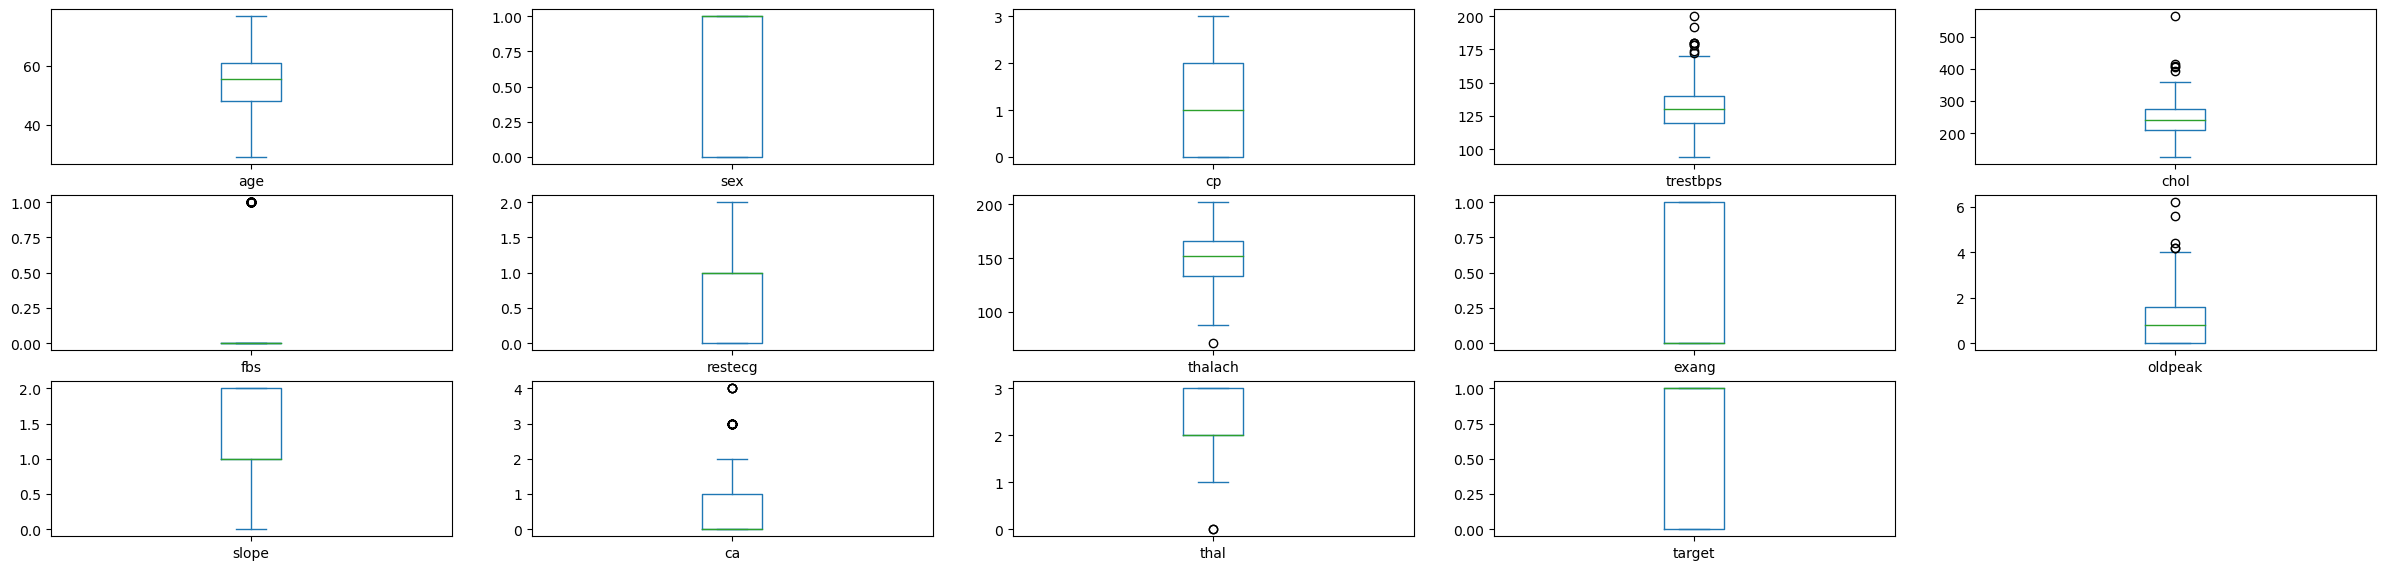

In [16]:
data.plot(kind='box', layout = (25,5), subplots = True, sharex = False, sharey = False, figsize=(30,60))
plt.show()


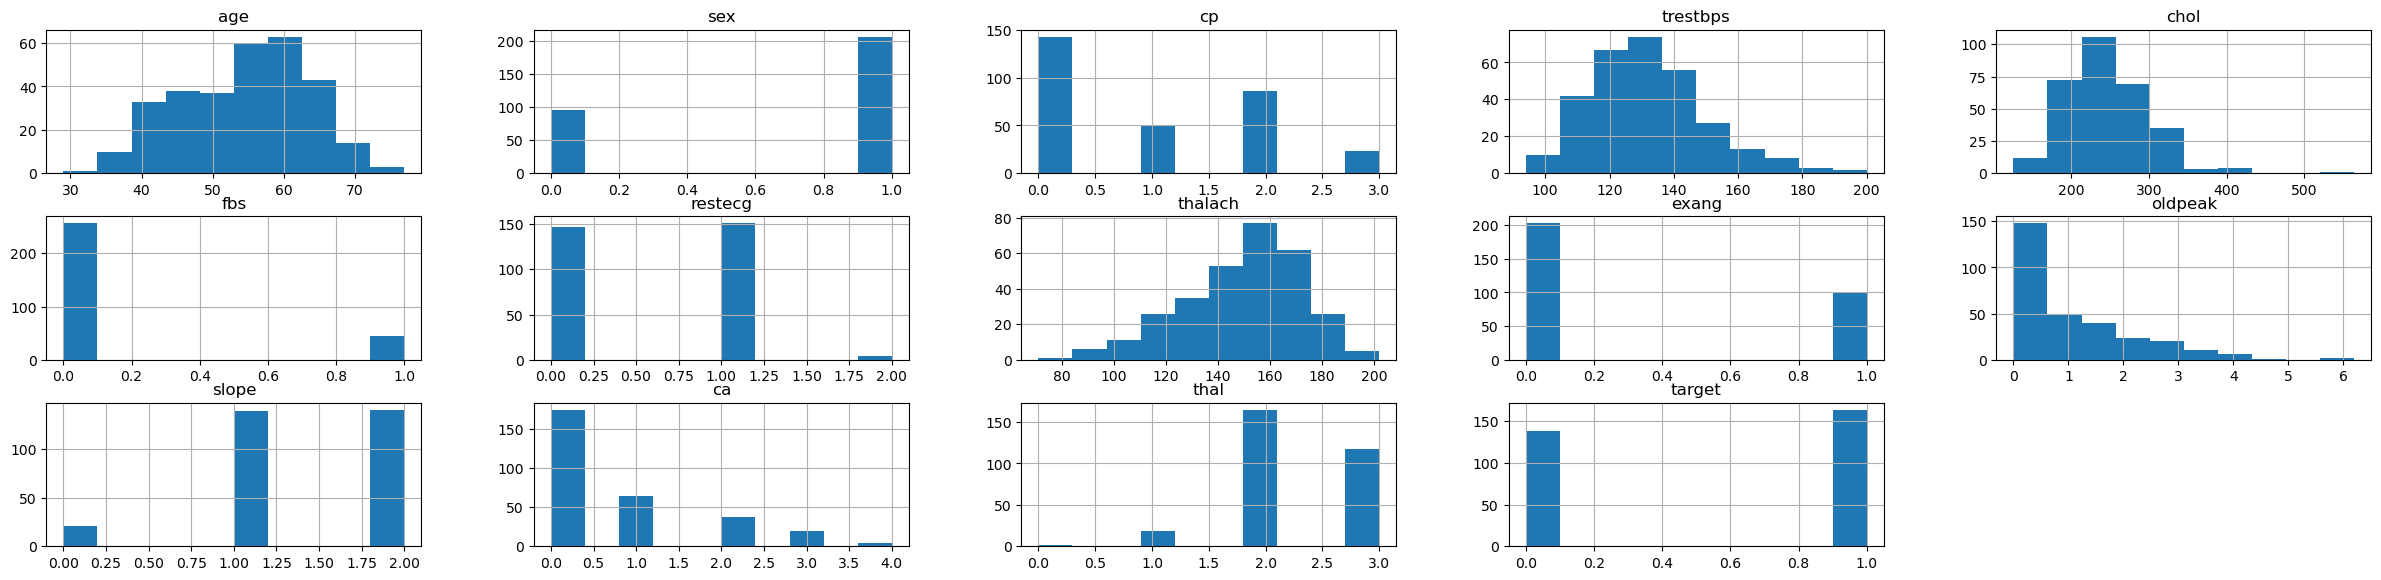

In [17]:
data.hist(layout=(25,5),figsize=(30,60))
plt.show()

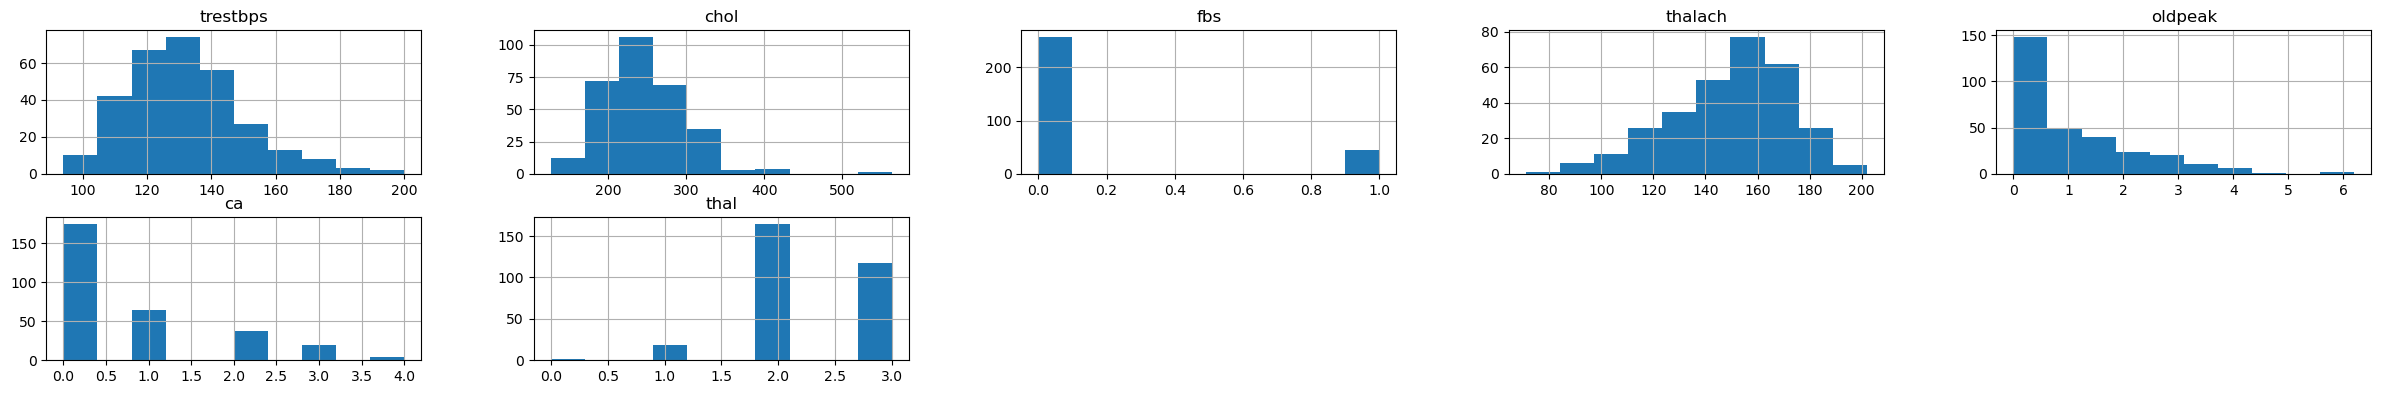

In [18]:
# Furthermore 
data[['trestbps','chol','fbs','thalach','oldpeak','ca','thal']].hist(layout=(25,5), figsize=(30,60))
plt.show()


Based on the analysis it can be ascertained that the given dataset contains outliers ---
Outliers (Features) : (i)trestbps (ii) chol (iii) fbs (iv) thalach (v) oldpeak (vi) ca and (vii)thal
Furthermore, based on the Histograms of features obtained, it can be observed that the features (omitting binary/multiclass outcome features --- sex, cp, exang and target) do not conform with Normal Distribution representation. 
The data in case of the above features are either left-skewed or right-skewed.

#### Z-Score calculation & Data Standardization :

In [19]:
z1 = stats.zscore(data['trestbps'])
z2 = stats.zscore(data['chol'])
z3 = stats.zscore(data['fbs'])
z4 = stats.zscore(data['thalach'])
z5 = stats.zscore(data['oldpeak'])
z6 = stats.zscore(data['ca'])
z7 = stats.zscore(data['thal'])

In [20]:
# Inserting the Z-Score so calculated into the DataFrame i.e Populating the Dataframe with calculated Z-Scores
data.insert(0,'Z_Score_trestbps',list(z1),True)
data.insert(0,'Z_Score_chol',list(z2),True)
data.insert(0,'Z_Score_fbs',list(z3),True)
data.insert(0,'Z_Score_thalach',list(z4),True)
data.insert(0,'Z_Score_oldpeak',list(z5),True)
data.insert(0,'Z_Score_ca',list(z6),True)
data.insert(0,'Z_Score_thal',list(z7),True)

In [21]:
data.head(10)

,Z_Score_thal,Z_Score_ca,Z_Score_oldpeak,Z_Score_thalach,Z_Score_fbs,Z_Score_chol,Z_Score_trestbps,age,sex,cp,...,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.119967,1.274980,-0.037124,0.806035,-0.418446,-0.667728,-0.376556,52,1,0,...,212,0,1,168,0,1.0,2,2,3,0
1,1.119967,-0.714911,1.773958,0.237495,2.389793,-0.841918,0.478910,53,1,0,...,203,1,0,155,1,3.1,0,0,3,0
2,1.119967,-0.714911,1.342748,-1.074521,-0.418446,-1.403197,0.764066,70,1,0,...,174,0,1,125,1,2.6,0,0,3,0
3,1.119967,0.280034,-0.899544,0.499898,-0.418446,-0.841918,0.935159,61,1,0,...,203,0,1,161,0,0.0,2,1,3,0
4,-0.513994,2.269926,0.739054,-1.905464,2.389793,0.919336,0.364848,62,0,0,...,294,1,1,106,0,1.9,1,3,2,0
5,-0.513994,-0.714911,-0.037124,-1.205722,-0.418446,0.029032,-1.802334,58,0,0,...,248,0,0,122,0,1.0,1,0,2,1
6,-2.147955,2.269926,2.895104,-0.418513,-0.418446,1.383842,-1.003898,58,1,0,...,318,0,2,140,0,4.4,0,3,1,0
7,1.119967,0.280034,-0.209608,-0.199843,-0.418446,0.822564,1.619532,55,1,0,...,289,0,0,145,1,0.8,1,1,3,0
8,1.119967,-0.714911,-0.209608,-0.243577,-0.418446,0.048386,-0.661712,46,1,0,...,249,0,0,144,0,0.8,2,0,3,0
9,-0.513994,1.274980,1.860200,-1.468126,-0.418446,0.764500,-0.547650,54,1,0,...,286,0,0,116,1,3.2,1,2,2,0


Filtering Data based on Z-Scores :

In [22]:
data.loc[data['Z_Score_trestbps'] > 1.96, 'trestbps'] = np.nan
data.loc[data['Z_Score_trestbps'] < -1.96, 'trestbps'] = np.nan

In [23]:
data.loc[data['Z_Score_chol'] > 1.96, 'chol'] = np.nan
data.loc[data['Z_Score_chol'] < -1.96, 'chol'] = np.nan


In [24]:
data.loc[data['Z_Score_fbs'] > 1.96, 'fbs'] = np.nan
data.loc[data['Z_Score_fbs'] < -1.96, 'fbs'] = np.nan


In [25]:
data.loc[data['Z_Score_thalach'] > 1.96, 'thalach'] = np.nan
data.loc[data['Z_Score_thalach'] < -1.96, 'thalach'] = np.nan


In [26]:
data.loc[data['Z_Score_oldpeak'] > 1.96, 'oldpeak'] = np.nan
data.loc[data['Z_Score_oldpeak'] < -1.96, 'oldpeak'] = np.nan


In [27]:
data.loc[data['Z_Score_ca'] > 1.96, 'ca'] = np.nan
data.loc[data['Z_Score_ca'] < -1.96, 'ca'] = np.nan


In [28]:
data.loc[data['Z_Score_thal'] > 1.96, 'thal'] = np.nan
data.loc[data['Z_Score_thal'] < -1.96, 'thal'] = np.nan


Dropping Extraneous Columns

In [29]:
columns_to_drop = ['Z_Score_trestbps','Z_Score_chol','Z_Score_fbs','Z_Score_thalach','Z_Score_oldpeak','Z_Score_ca','Z_Score_thal']
data.drop(columns=columns_to_drop,axis=1,inplace=True)


In [30]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0.0,1,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140.0,203.0,NaN,0,155.0,1,3.1,0,0.0,3.0,0
2,70,1,0,145.0,174.0,0.0,1,125.0,1,2.6,0,0.0,3.0,0
3,61,1,0,148.0,203.0,0.0,1,161.0,0,0.0,2,1.0,3.0,0
4,62,0,0,138.0,294.0,NaN,1,106.0,0,1.9,1,NaN,2.0,0


Data Pre-Processing : Checking Missing Values

In [31]:
print(data.isna().sum())

age          0
sex          0
cp           0
trestbps    15
chol        11
fbs         45
restecg      0
thalach     12
exang        0
oldpeak     17
slope        0
ca          24
thal        20
target       0
dtype: int64


In [32]:
# We can observe the presence of missing values for the given dataset under consideration because of Z-Score Standardization and Filtering

In [33]:
data['trestbps'] = data['trestbps'].fillna(data['trestbps'].mean())
data['chol'] = data['chol'].fillna(data['chol'].mean())


#### Cross-Checking Qualitative (Ordinal) Data :-

In [34]:
data['fbs'].value_counts()

fbs
0.0    257
Name: count, dtype: int64

In [35]:
data['oldpeak'].value_counts()

oldpeak
0.0    98
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
2.0     9
0.4     9
0.1     7
2.6     6
2.8     6
0.5     5
1.9     5
1.5     5
3.0     5
2.2     4
0.3     3
0.9     3
2.4     3
1.1     2
2.5     2
3.2     2
2.3     2
3.1     1
2.9     1
0.7     1
2.1     1
1.3     1
Name: count, dtype: int64

In [36]:
data['thal'].value_counts()

thal
2.0    165
3.0    117
Name: count, dtype: int64

In [37]:
data['ca'].value_counts()

ca
0.0    175
1.0     65
2.0     38
Name: count, dtype: int64

In [38]:
data['thalach'] = data['thalach'].fillna(data['thalach'].mean()) 
data['oldpeak'] = data['oldpeak'].fillna(data['oldpeak'].median())

In [39]:
data['fbs'] = data['fbs'].fillna(data['fbs'].mode()[0])
data['ca'] = data['ca'].fillna(data['ca'].mode()[0])
data['thal'] = data['thal'].fillna(data['thal'].mode()[0])

In [40]:
# Checking for Null Values for the given Dataset :
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


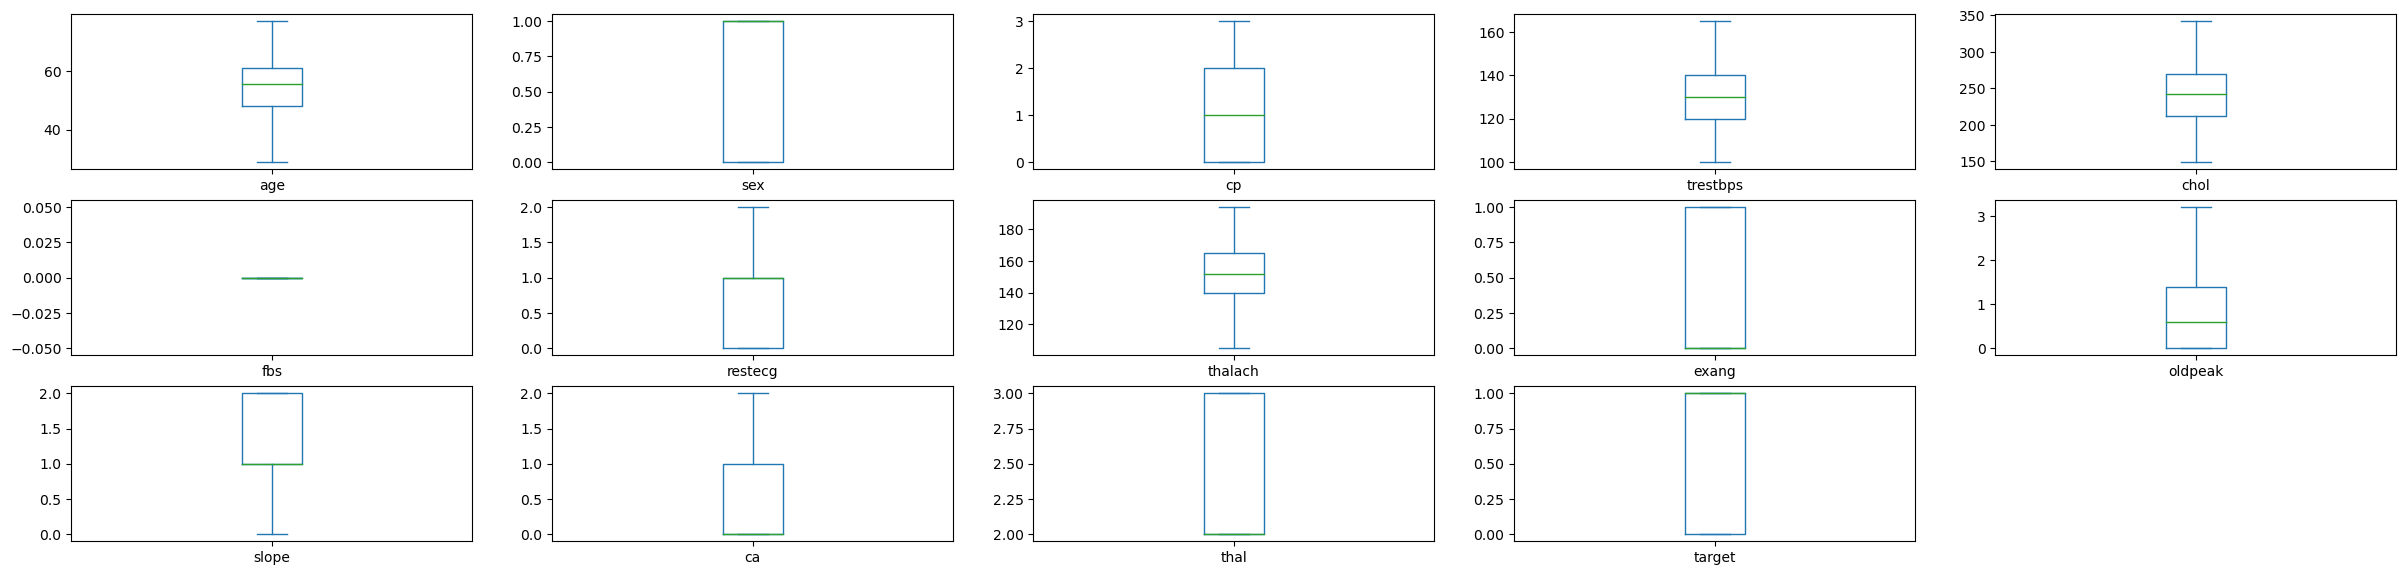

In [41]:
data.plot(kind='box',layout=(25,5),subplots=True,sharex=False,sharey=False,figsize=(30,60))
plt.show()

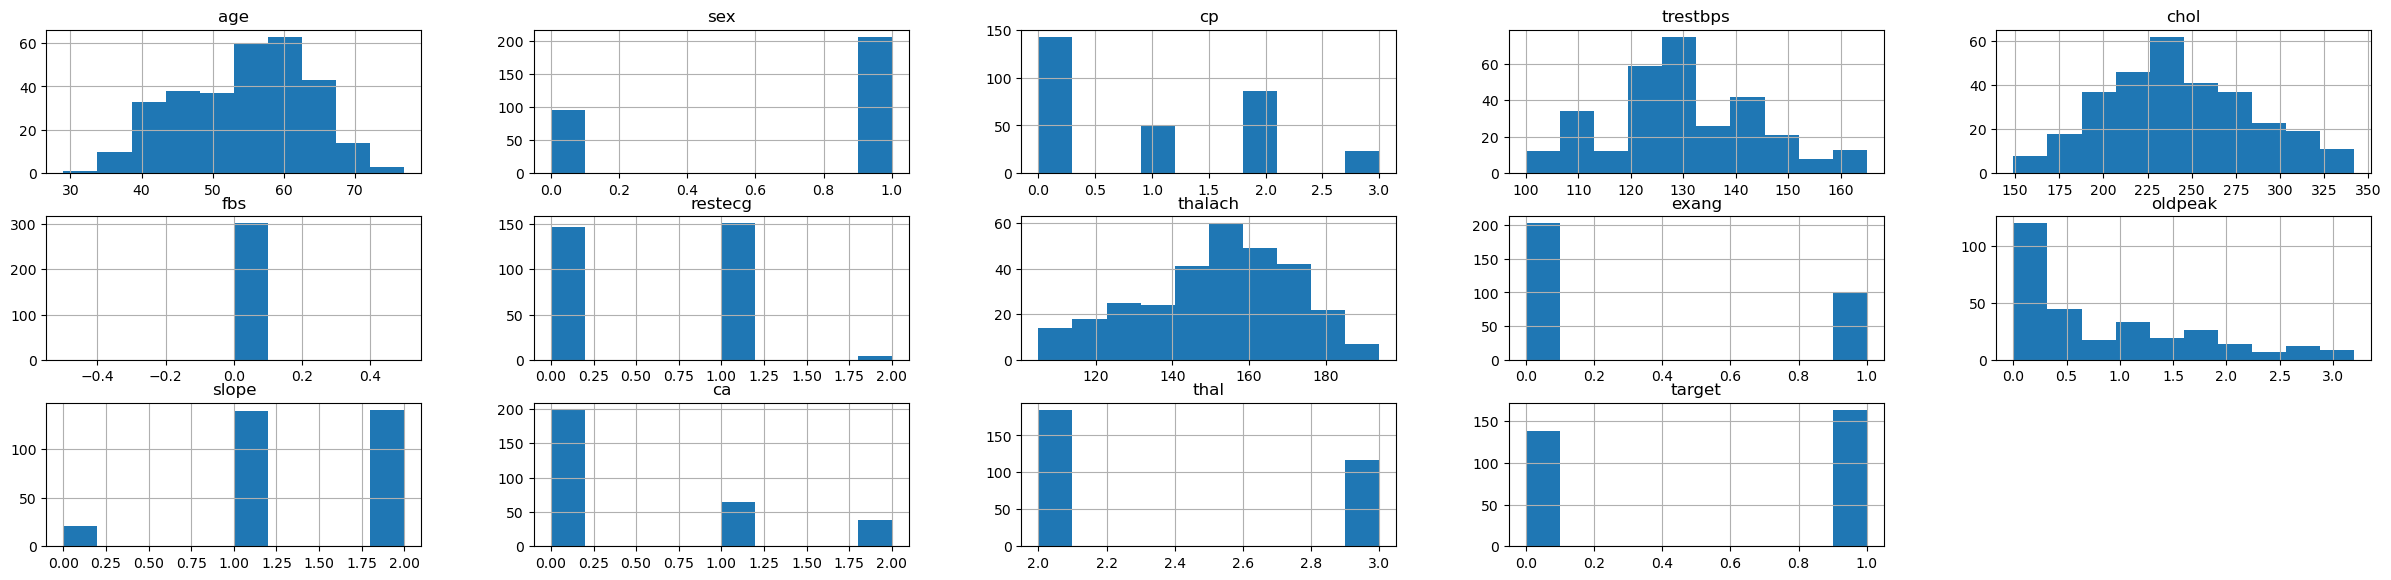

In [42]:
data.hist(layout=(25,5),figsize=(30,60))
plt.show()

In [43]:
print(data.shape)

(302, 14)


Based on the above analysis it can be ascertained that the data is clean (with outliers removed) and there exists no null values in the given dataset. Furthermore, the given dataset does not contain any duplicate values in it.

## Exploratory Data Analysis (EDA) & Information Visualization :

### Question Bank :
1.How many people have heart disease and how many people of the given sample population of the dataset do not have heart disease ?

2.Determine the heart disease occurence based on sex (i.e People of which sex has most heart disease)?

3.Determine heart disease occurence on the basis of age? Determine the average age of people suffering from heart disease ?

4.Determine the types of chest pain ? People of which sex has which type of chest pain most ?

5.Determine the chest pain type for people of the given population sample that is most prone to heart disease ?

6.Determine heart disease occurence based on Blood Pressure ? Determine the average Blood Pressure measure for a Heart disease patient ?

7.Determine Resting ECG impact on Heart Disease patient ? 

8.Determine the impact of Cholestrol levels in Heart Disease scenario ? Determine the average Cholestrol level measure for Heart Disease patients ?


In [44]:
# 1. To analyze and determine from the given population sample how many people have heart disease and how many do not have heart disease ---
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [45]:
data['target'].value_counts(normalize=True)

target
1    0.543046
0    0.456954
Name: proportion, dtype: float64

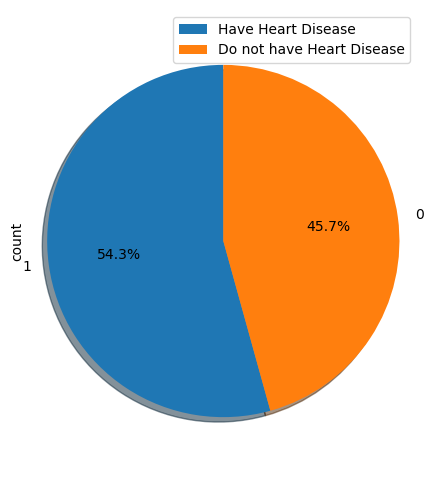

In [46]:
data['target'].value_counts().plot(kind='pie',figsize=(5,6),autopct='%1.1f%%',startangle=90,shadow=True)
plt.legend(["Have Heart Disease","Do not have Heart Disease"])
plt.axis('equal')
plt.show()

Based on the analysis it can be observed that 54.3% of people have Heart disease, while 45.7% of people do not have Heart disease

In [47]:
# 2. To analyze and determine heart disease occurence based on sex
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

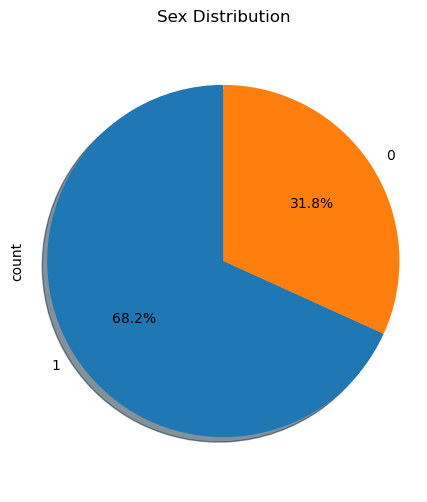

In [48]:
data['sex'].value_counts().plot(kind='pie',figsize=(5,6),autopct='%1.1f%%',startangle=90,shadow=True)
plt.axis('equal')
plt.title('Sex Distribution')
plt.show()

Based on the above analysis it can be observed that 68.2% of the population are males while 31.8% of the population comprises females.

In [49]:
heart_disease_with_sex = pd.crosstab(data['sex'],data['target'])
heart_disease_with_sex


target,0,1
sex,,
0,24,72
1,114,92


In [50]:
heart_disease_females = data[(data['target']==1)&(data['sex']==0)].value_counts()
print(len(heart_disease_females))

72


In [51]:
heart_disease_males = data[(data['target']==1)&(data['sex']==1)].value_counts()
print(len(heart_disease_males))

92


In [52]:
heart_disease_male_percent = (len(heart_disease_males)/206)*100
print(heart_disease_male_percent)

44.66019417475729


In [53]:
heart_disease_female_percent = (len(heart_disease_females)/96)*100
print(heart_disease_female_percent)

75.0


In [54]:
total_heart_disease_male_percent = (len(heart_disease_males)/302)*100
total_heart_disease_female_percent = (len(heart_disease_females)/302)*100
print('Total percentage of male population having heart disease :',total_heart_disease_male_percent)
print('Total percentage of female population having heart disease :',total_heart_disease_female_percent)

Total percentage of male population having heart disease : 30.4635761589404
Total percentage of female population having heart disease : 23.841059602649008


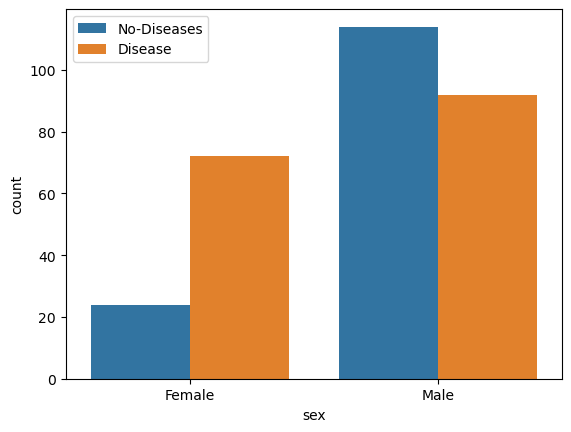

In [55]:
sns.countplot(x='sex',hue='target',data=data)
plt.legend(['No-Diseases','Disease'])
plt.xticks([0,1],['Female','Male'])
plt.show()


Based on the above analysis it can be said that females are more prone to heart disease as compared to males

In [56]:
# 3. To analyze and determine heart disease occurence based on age from the given population sample

In [57]:
heart_disease_and_age = pd.crosstab(data['age'],data['target'])
heart_disease_and_age.head(15)

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,1
39,1,3
40,2,1
41,1,9
42,1,7


In [58]:
average_heart_disease_age = int(data[(data["target"]==1)]["age"].mean())
print("Average age of Heart disease patients :",average_heart_disease_age)

Average age of Heart disease patients : 52


In [59]:
age_cholestrol_group = data.pivot_table(values='chol',index=['age'],columns=['target'],aggfunc='mean')

In [60]:
age_cholestrol_group.head(25)

target,0,1
age,,
29,NaN,204.000000
34,NaN,196.000000
35,240.000000,187.500000
37,NaN,232.500000
38,231.000000,175.000000
39,219.000000,246.666667
40,195.000000,199.000000
41,172.000000,226.111111
42,315.000000,237.000000


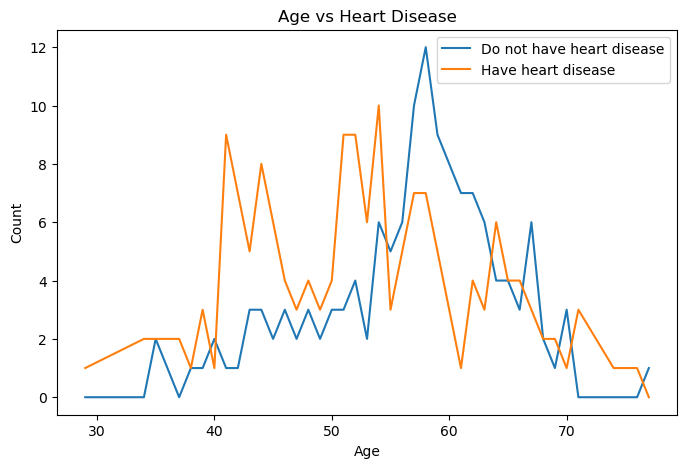

In [61]:
heart_disease_and_age.plot(kind='line',figsize=(8,5))
plt.legend(["Do not have heart disease","Have heart disease"])
plt.title('Age vs Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

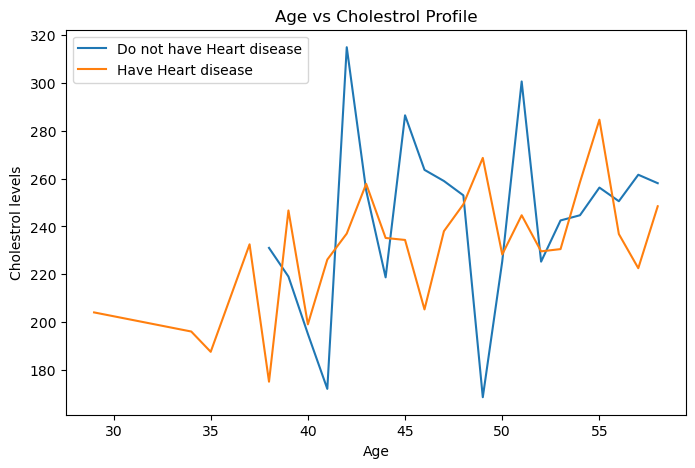

In [62]:
age_cholestrol_group.head(25).plot(kind='line',figsize=(8,5))
plt.title('Age vs Cholestrol Profile')
plt.legend(["Do not have Heart disease","Have Heart disease"])
plt.xlabel('Age')
plt.ylabel('Cholestrol levels')
plt.show()

From the above analysis it has been found that the average age of patients having heart disease is 52 and further people within the age group (40-55) are most susceptible to heart disease. This can be further supported on grounds of the visible high levels of cholestrol for the above-mentioned age group.

In [63]:
# 4. To analyze and determine the chest pain types and gender of people with their respective chest pain types
data['cp'].value_counts()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

In [64]:
# Here 0- No Chest Pain, 1- Mild Chest pain, 2-Moderate Chest Pain and 3-Severe Chest Pain

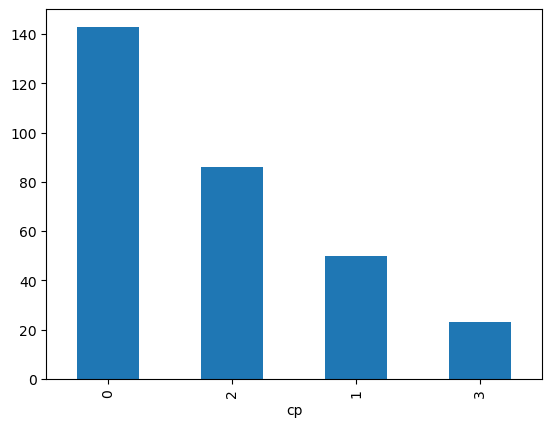

In [65]:
data['cp'].value_counts().plot(kind='bar')
plt.show()

Based on the above analysis it can be observed that for the given population sample mostly people have cases of no chest pain, followed by cases of moderate chest pain, thereafter followed by cases of mild chest pain and very low instances of severe chest pain

In [66]:
data.groupby(["cp"])["sex"].value_counts()

cp  sex
0   1      104
    0       39
1   1       32
    0       18
2   1       51
    0       35
3   1       19
    0        4
Name: count, dtype: int64

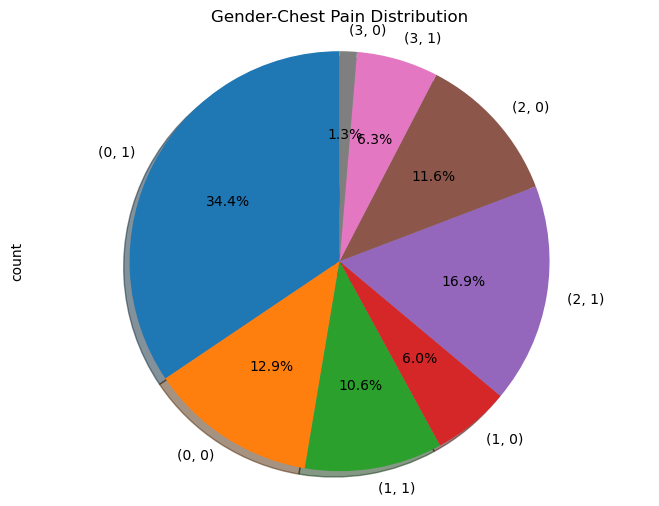

In [70]:
data.groupby(["cp"])["sex"].value_counts().plot(kind='pie', figsize=(8,6),autopct='%1.1f%%',startangle=90,shadow=True)
plt.title("Gender-Chest Pain Distribution")
plt.axis("equal")
plt.show()


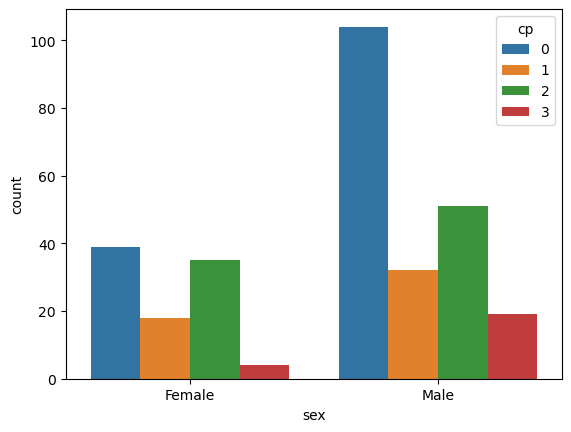

In [115]:
# Alternatively, we have the following :
sns.countplot(x='sex',hue='cp',data=data)
plt.xticks([0,1],['Female','Male'])
plt.show()

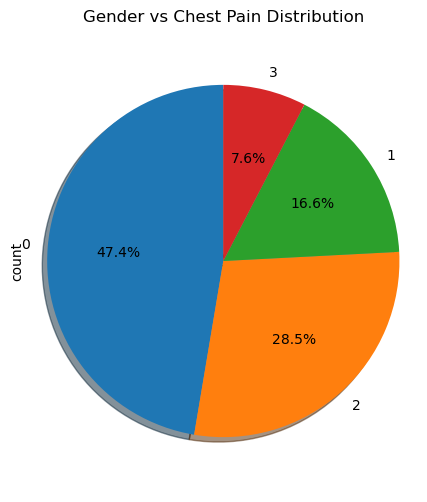

In [71]:
data['cp'].value_counts().plot(kind='pie',figsize=(5,6),autopct='%1.1f%%',startangle=90,shadow=True)
plt.title('Gender vs Chest Pain Distribution')
plt.axis('equal')
plt.show()

From the above analysis it can be concluded that for the given population sample mostly people have no chest pain, followed by moderate chest pain, thereafter followed by mild chest pain and very low instances of severe chest pain wherefore we have the following :

(i) No Chest Pain profile - 34.4% of male population and 12.9% of female population

(ii) Mild Chest Pain profile - 10.6% of male population and 6.0% of female population

(iii) Moderate Chest Pain profile - 16.9% of male population and 11.6% of female population

(iv) Severe Chest Pain profile - 6.3% of male population and 1.3% of female population


Therefore, we have 47.4% having no chest pain, 28.5% of people having moderate chest pain, 16.6% of people having mild chest pain and 7.6% of people having severe chest pain. 

In [73]:
# 5. To analyze and determine chest pain type corresponding with Heart Disease cases
data.groupby(['cp'])['target'].value_counts().sort_values(ascending=False)

cp  target
0   0         104
2   1          68
1   1          41
0   1          39
2   0          18
3   1          16
1   0           9
3   0           7
Name: count, dtype: int64

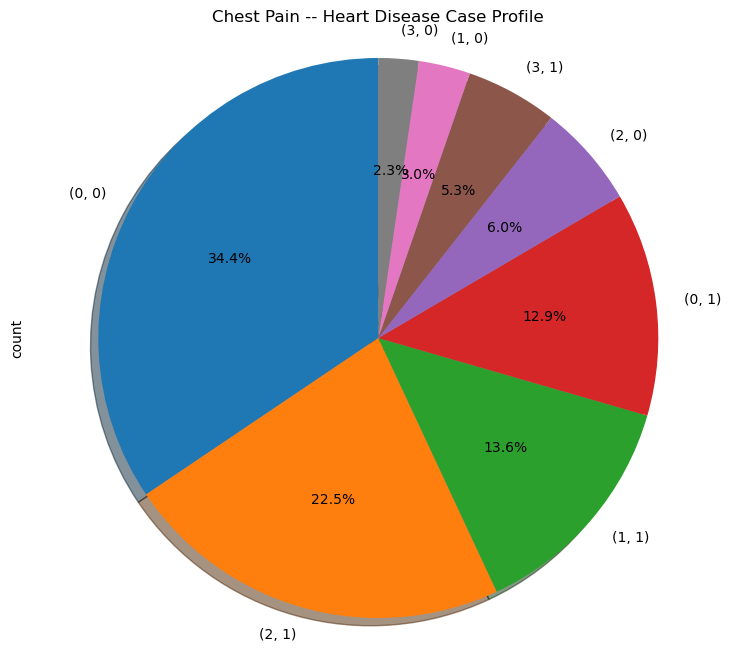

In [79]:
data.groupby(['cp'])['target'].value_counts().sort_values(ascending=False).plot(kind='pie', figsize=(9,8),autopct='%1.1f%%',startangle=90,shadow=True)
plt.title("Chest Pain -- Heart Disease Case Profile")
plt.axis('equal')
plt.show()


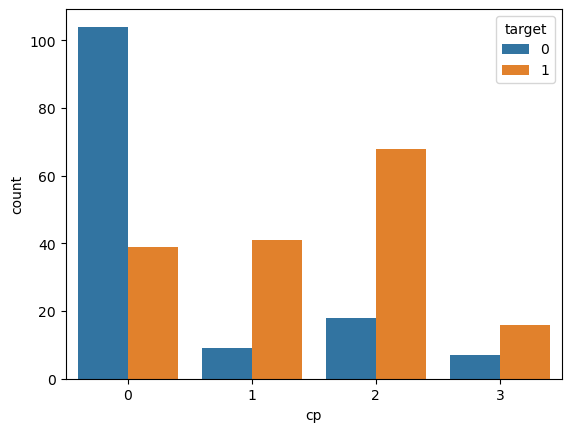

In [83]:
sns.countplot(x='cp',hue='target',data=data)
plt.show()

In [84]:
# Furthermore, we have ---
data['cp'].value_counts()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

In [85]:
data.groupby(['cp'])['target'].value_counts().sort_values(ascending=False)

cp  target
0   0         104
2   1          68
1   1          41
0   1          39
2   0          18
3   1          16
1   0           9
3   0           7
Name: count, dtype: int64

In [87]:
                    # Computing Ratio --- Chest Pain to Heart Disease case #
# No chest Pain case :-
print("No Chest Pain-No Heart Disease ratio :",104/143)
print("No Chest Pain-Having Heart Disease ratio :",39/143)
print()
# Mild Chest Pain case :-
print("Mild Chest Pain-No Heart Disease ratio :",9/50)
print('Mild Chest Pain-Having Heart Disease ratio :',41/50)
print()
# Moderate Chest Pain case :-
print("Moderate Chest Pain-No Heart Disease ratio :",18/86)
print("Moderate Chest Pain-Having Heart Disease ratio :",68/86)
print()
# Severe Chest Pain case :-
print("Severe Chest Pain-No Heart Disease ratio :",7/23)
print("Severe Chest Pain-Having Heart Disease ratio :",16/23)

No Chest Pain-No Heart Disease ratio : 0.7272727272727273
No Chest Pain-Having Heart Disease ratio : 0.2727272727272727

Mild Chest Pain-No Heart Disease ratio : 0.18
Mild Chest Pain-Having Heart Disease ratio : 0.82

Moderate Chest Pain-No Heart Disease ratio : 0.20930232558139536
Moderate Chest Pain-Having Heart Disease ratio : 0.7906976744186046

Severe Chest Pain-No Heart Disease ratio : 0.30434782608695654
Severe Chest Pain-Having Heart Disease ratio : 0.6956521739130435


From the above analysis it can be concluded that :- 
(i) 34.4% of entire population of people having no chest pain do not have heart disease

(ii) 12.9% of entire population of people having no chest pain have heart disease

(iii) 3% of entire population  of people having mild chest pain do not have heart disease

(iv) 13.6% of entire population of people having mild chest pain have heart disease

(v) 6% of entire population of people with moderate chest pain do not have heart disease

(vi) 22.5% of entire population of people with moderate chest pain have heart disease

(vii) 2.3% of the entire population of people with severe chest pain do not have heart disease

(viii) 5.3% of the entire population of people with severe chest pain case have heart disease

Mostly, it can be observed that people with mild-moderate chest pain cases have heart diseses.

In [92]:
# 6. To analyze and determine heart disease occurence based on Blood Pressure Levels :-
BloodPressure_HeartDisease_group = data[["trestbps","target"]].groupby(["trestbps"])

In [94]:
BloodPressure_HeartDisease_group.head()

,trestbps,target
0,125.0,0
1,140.0,0
2,145.0,0
3,148.0,0
4,138.0,0
...,...,...
570,135.0,1
580,101.0,1
594,145.0,0
616,115.0,1


In [101]:
BloodPressure_HeartDisease_pivotgroup = data.pivot_table(values='trestbps',index=['age'],columns=['target'],aggfunc='mean')
BloodPressure_HeartDisease_pivotgroup.head(25) 

target,0,1
age,,
29,NaN,130.000000
34,NaN,118.000000
35,123.000000,130.000000
37,NaN,125.000000
38,120.000000,138.000000
39,118.000000,135.921022
40,131.000000,140.000000
41,110.000000,120.000000
42,136.000000,125.714286


In [95]:
average_bps_heartdisease = data[(data['target']==1)]["trestbps"].mean()
print("Average Blood Pressure measurement in Heart Disease case :",average_bps_heartdisease)

Average Blood Pressure measurement in Heart Disease case : 128.58279510495453


Therefore, the average Blood Pressure measurement for Heart Disease case is 128.59

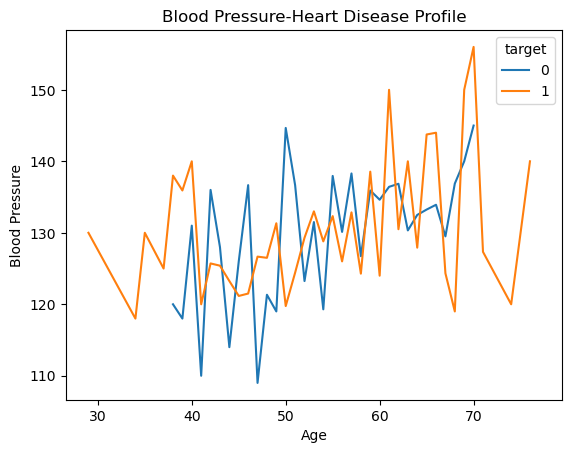

In [113]:
BloodPressure_HeartDisease_pivotgroup.plot(kind='line')
plt.title('Blood Pressure-Heart Disease Profile')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

Based on the above analysis it can be ascertained that Blood Pressure induced heart disease increases proportionally with age of the patient. Furthermore, the average Blood Pressure measurement for Heart Disease case is 128.59

In [116]:
# 7. To analyze and determine Resting ECG impact on Heart Disease patient
data['restecg'].value_counts()

restecg
1    151
0    147
2      4
Name: count, dtype: int64

In [117]:
# Here we have the following metrics as given below :-
# 0 - Normal ECG, 1- Mild change in ECG and 2- Severe change in ECG

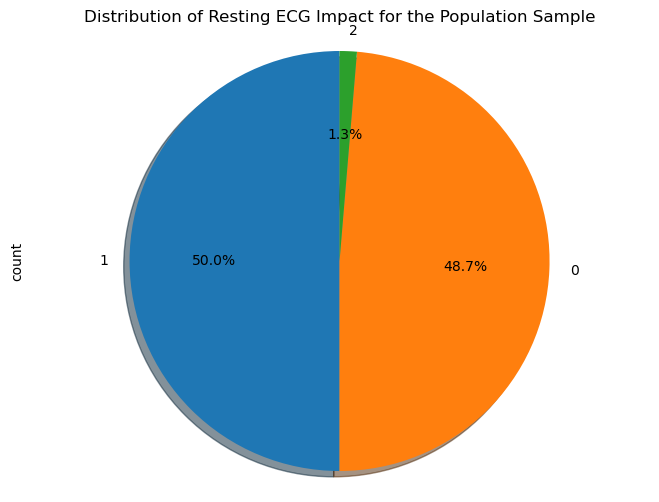

In [118]:
# Plotting the distribution for the same
data['restecg'].value_counts().plot(kind='pie',figsize=(8,6),autopct='%1.1f%%',startangle=90,shadow=True)
plt.title('Distribution of Resting ECG Impact for the Population Sample')
plt.axis('equal')
plt.show()


From the above analysis it can be observed that 48.7% of registered patients have normal resting ECG, 50% of patients have mild change in rest ECG and 1.3% of patients have severe change in rest ECG condition. 

In [119]:
rest_ecg_target = pd.crosstab(data.restecg,data.target)
rest_ecg_target

target,0,1
restecg,,
0,79,68
1,56,95
2,3,1


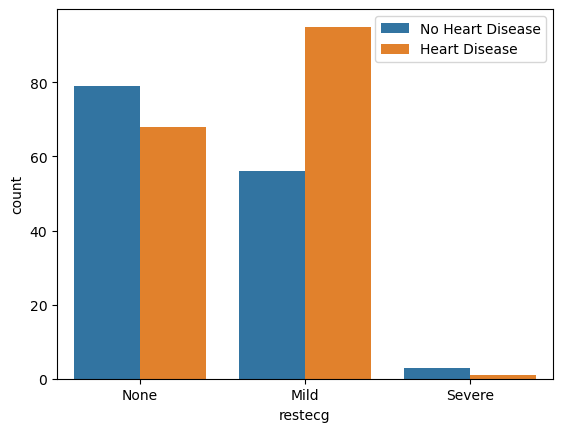

In [120]:
sns.countplot(x='restecg',hue='target',data=data)
plt.xticks([0,1,2],['None','Mild','Severe'])
plt.legend(['No Heart Disease','Heart Disease'])
plt.show()

From the above analysis it can be ascertained that cases pertaining to mild change in Rest ECG are usually better indicators of Heart disease.

In [121]:
# 8. To analyze and determine the impact of cholestrol on Heart Disease patients 

In [134]:
cholestrol_target_group = pd.crosstab(data.chol,data.target)
cholestrol_target_group

target,0,1
chol,,
149.0,1,1
157.0,0,1
160.0,0,1
164.0,1,0
166.0,1,0
...,...,...
330.0,2,0
335.0,2,0
340.0,0,1


In [128]:
chol_target_group_pivot = pd.pivot_table(data,values='chol',index=['age'],columns=['target'],aggfunc='mean')
chol_target_group_pivot.head()

target,0,1
age,,
29,NaN,204.0
34,NaN,196.0
35,240.0,187.5
37,NaN,232.5
38,231.0,175.0


In [129]:
average_cholestrol_level = data[(data['target']==1)]['chol'].mean()
print("Average Cholestrol level of Heart Disease patients :", average_cholestrol_level)

Average Cholestrol level of Heart Disease patients : 238.65719554102756


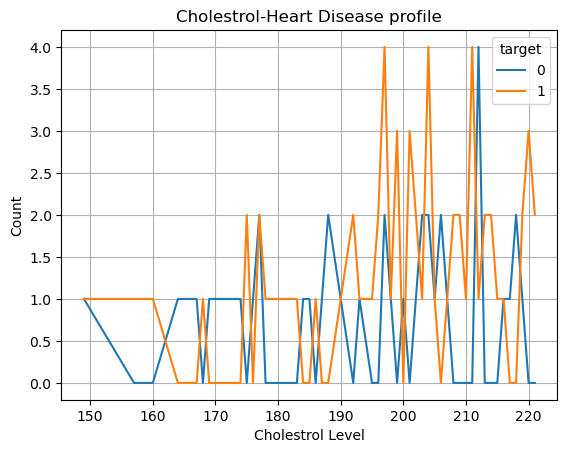

In [139]:
cholestrol_target.head(50).plot(kind='line',grid=True)
plt.title('Cholestrol-Heart Disease profile')
plt.xlabel('Cholestrol Level')
plt.ylabel('Count')
plt.show()

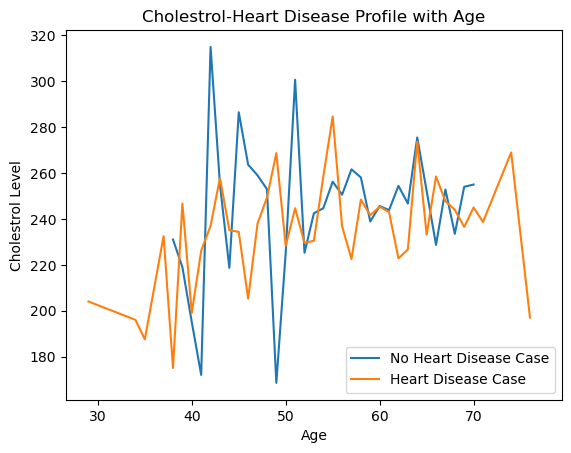

In [141]:
chol_target_group_pivot.plot(kind='line')
plt.title('Cholestrol-Heart Disease Profile with Age')
plt.legend(["No Heart Disease Case","Heart Disease Case"])
plt.xlabel('Age')
plt.ylabel('Cholestrol Level')
plt.show()

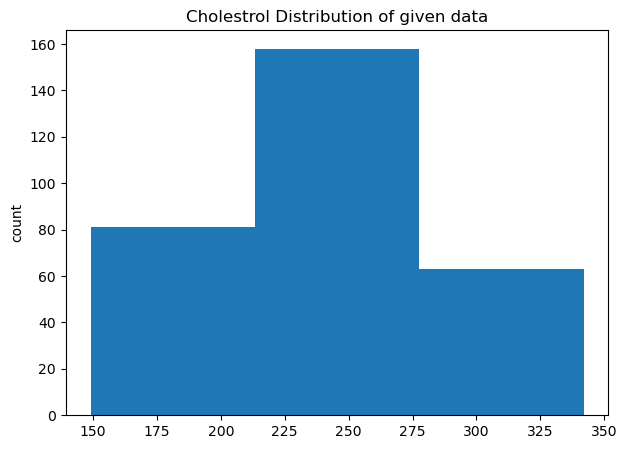

In [145]:
plt.figure(figsize=(7,5))
data['chol'].plot(kind='hist',bins=3)
plt.title('Cholestrol Distribution of given data')
plt.ylabel('count')
plt.show()

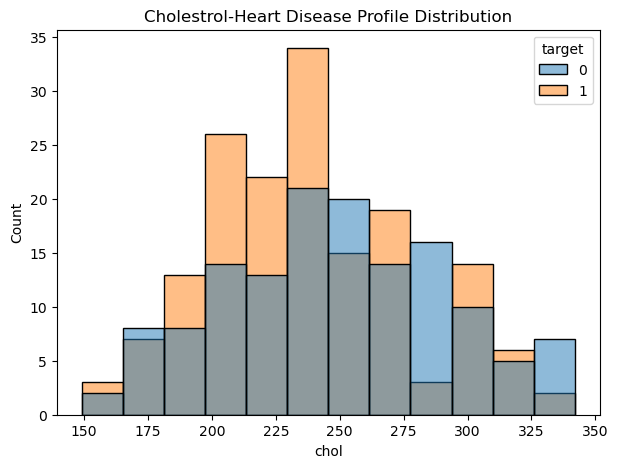

In [147]:
plt.figure(figsize=(7,5))
sns.histplot(data=data,x='chol',hue='target',kde=False)
plt.title('Cholestrol-Heart Disease Profile Distribution')
plt.show()

Based on the above analysis it can be concluded that -- Cholestrol levels generally increase with age of the patient with high frequency of Heart Disease cases at cholestrol levels in between 200-250 units. The average cholestrol level of heart disease patients is 238.65. 

## Summary and Recommendations :-

From the data there are 54.3% of people that have Heart disease, while 45.7% of people do not have Heart disease.
 
Out of the given population 68.2% are males while 31.8% comprises females. 

Females are more prone to heart disease as compared to males with 75% of the total population of females out of the given dataset are suffering from Heart disease.

The age group (40-55) are most susceptible to heart disease with the average age being 52.

Mostly people have no chest pain (47.4%), followed by moderate chest pain (28.5%), thereafter followed by mild chest pain(16.6%) and very low instances of severe chest pain (7.6%). Furthermore, people with mild-moderate chest pain cases have high frequency of heart disese cases.

Blood Pressure induced heart disease increases proportionally with age of the patient. Furthermore, the average Blood Pressure measurement for Heart Disease case is 128.59

48.7% of registered patients have normal resting ECG, 50% of patients have mild change in rest ECG and 1.3% of patients have severe change in rest ECG condition wherein cases pertaining to mild change in Rest ECG are usually better indicators of Heart disease.

Cholestrol levels generally increase with age of the patient with high frequency of Heart Disease cases at cholestrol levels in between 200-250 units. The average cholestrol level of heart disease patients is 238.65.



#### Inference : Females with age 52 and above having conditions such as mild-moderate chest pain, Rest BP measurement of 128.59 with cholestrol levels at 200-250 units are most prone or susceptible to Heart diseases. 